In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\SOOSAN SHABNAM\OneDrive\Desktop\STC Task 2\StudentsPerformance.csv')
lr=df["race/ethnicity"]
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df['avg_score']=(df['math score']+df['reading score']+df['writing score'])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   avg_score                    1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


# TASK 2(PART 1) --> ANSWER 1


In [5]:
df.groupby(by='gender')['avg_score'].mean()

gender
female    69.569498
male      65.837483
Name: avg_score, dtype: float64

# TASK 2(PART 1)--> ANSWER 2      

In [6]:
df['gender'].value_counts()


female    518
male      482
Name: gender, dtype: int64

In [7]:
len(df[(df['gender'] == 'male') &
     (df['math score'] > 80) & 
     (df['reading score'] > 85)&
    (df['parental level of education']=='bachelor\'s degree')])*100/482

1.037344398340249

# TASK 2(PART 1)--> ANSWER 3

In [8]:
options=['bachelor\'s degree','high school']
len(df[(df['gender']=='male')& (df['race/ethnicity']=='group E')& (df['parental level of education'].isin(options))])

18

# TASK 2(PART 1)--> ANSWER 4

<AxesSubplot:xlabel='race/ethnicity'>

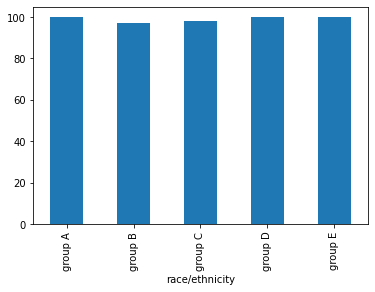

In [9]:
df.groupby(by='race/ethnicity')['math score'].max().plot(kind="bar")

<AxesSubplot:xlabel='race/ethnicity'>

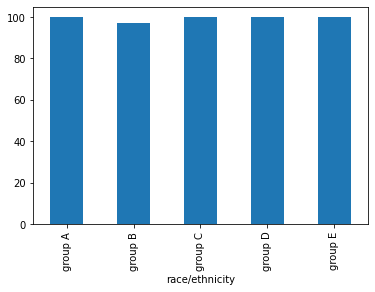

In [10]:
df.groupby(by='race/ethnicity')['reading score'].max().plot(kind="bar")

<AxesSubplot:xlabel='race/ethnicity'>

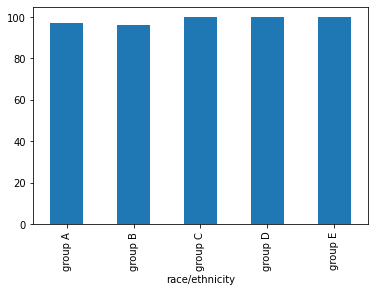

In [11]:
df.groupby(by='race/ethnicity')['writing score'].max().plot(kind="bar")

# TASK 2(PART 1)--> ANSWER 5

<AxesSubplot:xlabel='gender'>

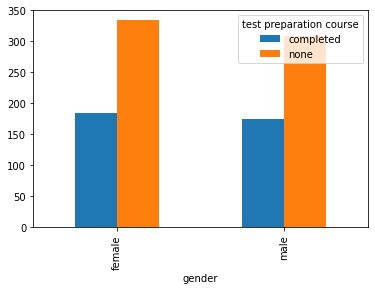

In [12]:
df1 =df.groupby(['gender','test preparation course']).size()
df1 = df1.unstack()
df1.plot(kind = 'bar')

# TASK 2(PART 1)--> ANSWER 6

<AxesSubplot:xlabel='gender'>

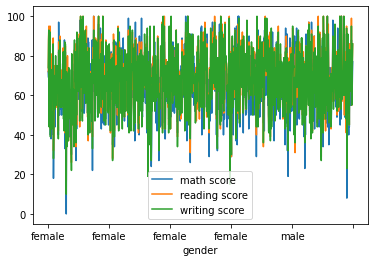

In [13]:
df.plot(x="gender",y=["math score","reading score","writing score"])

# TASK 2(PART 1)--> ANSWER 7

<AxesSubplot:>

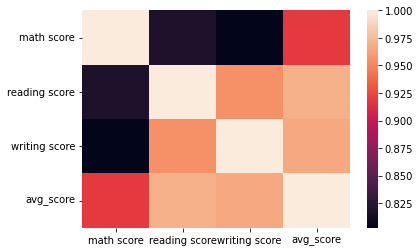

In [14]:
sns.heatmap(df.corr())

# TASK 2(PART 1)--> ANSWER 8

<AxesSubplot:xlabel='parental level of education', ylabel='avg_score'>

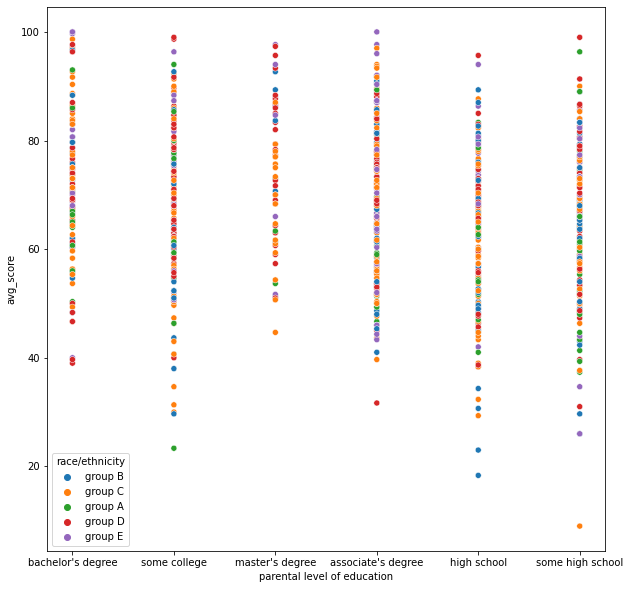

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x="parental level of education", y="avg_score", hue="race/ethnicity")

# TASK 2(PART 1)--> ANSWER 9

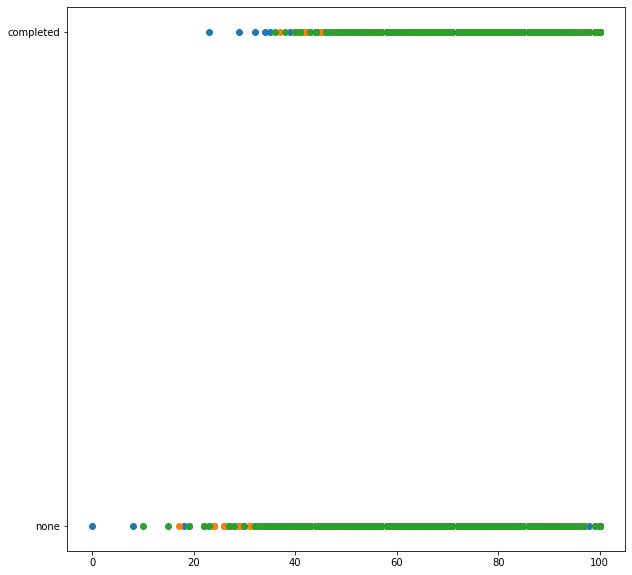

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(df['math score'], df['test preparation course'])
plt.scatter(df['reading score'], df['test preparation course'])
plt.scatter(df['writing score'], df['test preparation course'])


# TASK 2(PART 1)--> ANSWER 10

<AxesSubplot:xlabel='math score', ylabel='Density'>

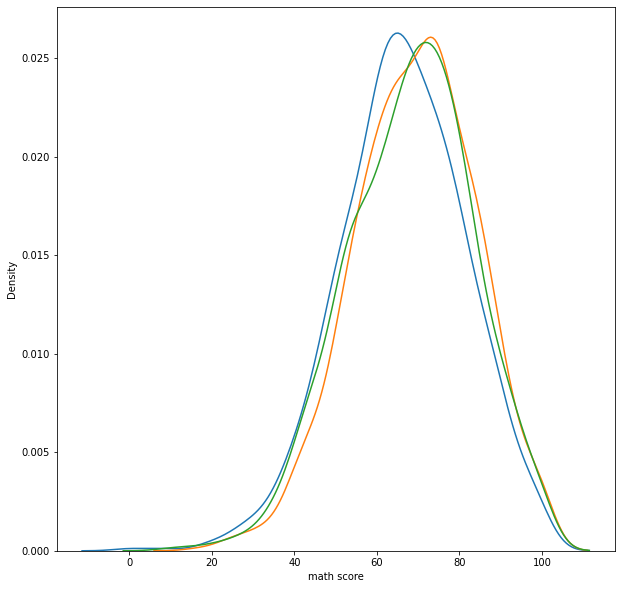

In [17]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=df, x='math score')
sns.kdeplot(data=df, x='reading score')
sns.kdeplot(data=df, x='writing score')          ## graph is right skewed 

# TASK 2(PART 1)--> BONUS

In [18]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [19]:
df['gender']=df['gender'].replace(['female','male'],[0,1])
df['test preparation course']=df['test preparation course'].replace(['none','completed'],[0,1])
df['race/ethnicity']=df['race/ethnicity'].replace(['group A','group B','group C','group D','group E'],[1,2,3,4,5])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,0,2,bachelor's degree,standard,0,72,72,74,72.666667
1,0,3,some college,standard,1,69,90,88,82.333333
2,0,2,master's degree,standard,0,90,95,93,92.666667
3,1,1,associate's degree,free/reduced,0,47,57,44,49.333333
4,1,3,some college,standard,0,76,78,75,76.333333


In [20]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [21]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [22]:
df['lunch']=df['lunch'].replace(['standard','free/reduced'],[0,1])
df['parental level of education']=df['parental level of education'].replace(['bachelor\'s degree','some college','master\'s degree','associate\'s degree','high school','some high school'],[1,2,3,4,5,6])

In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,0,2,1,0,0,72,72,74,72.666667
1,0,3,2,0,1,69,90,88,82.333333
2,0,2,3,0,0,90,95,93,92.666667
3,1,1,4,1,0,47,57,44,49.333333
4,1,3,2,0,0,76,78,75,76.333333


# TASK 2(PART 2)--> ANSWER 1 AND 3

In [24]:
X=df.drop(['math score','reading score','writing score'],axis=1)
y1=df['math score']
y2=df['reading score']
y3=df['writing score']

In [25]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y1,test_size=0.2,random_state=101)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=101)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=101)
  

In [26]:
def run_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    preds=model.predict(X_test)
    from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    mae=mean_absolute_error(y_test,preds)
    print(f'MAE IS {mae}')
    print(f'RMSE IS {rmse}')
    sns.scatterplot(x=y_test,y=preds)
    

# Linear Regression:

For maths score:
MAE IS 3.0615883758291
RMSE IS 3.871461068667278
For reading score:
MAE IS 2.4691340363413605
RMSE IS 3.151314599279383
For writing score:
MAE IS 2.1715162429251302
RMSE IS 2.7198743131692713


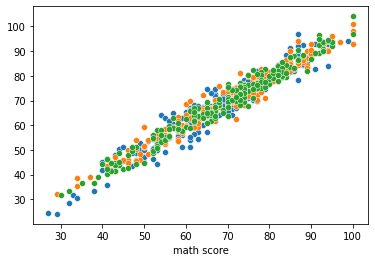

In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
print("For maths score:")
run_model(model,X1_train,y1_train,X1_test,y1_test)
print("For reading score:")
run_model(model,X2_train,y2_train,X2_test,y2_test)
print("For writing score:")
run_model(model,X3_train,y3_train,X3_test,y3_test)


# Polynomial Regression:

For maths score:
MAE IS 3.684228573032451
RMSE IS 4.742841040362824
For reading score:
MAE IS 3.059082474792467
RMSE IS 3.931445207848479
For writing score:
MAE IS 2.599616934434812
RMSE IS 3.4464325959424285


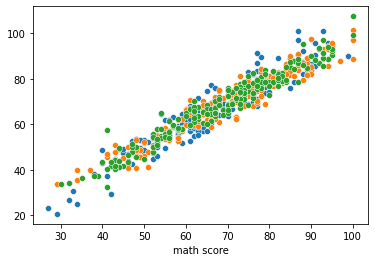

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe=make_pipeline(PolynomialFeatures(degree=5),LinearRegression())
print("For maths score:")
run_model(pipe,X1_train,y1_train,X1_test,y1_test)
print("For reading score:")
run_model(pipe,X2_train,y2_train,X2_test,y2_test)
print("For writing score:")
run_model(pipe,X3_train,y3_train,X3_test,y3_test)

# KNN:

For maths score:
MAE IS 3.9210000000000003
RMSE IS 4.89548771829733
For reading score:
MAE IS 2.698
RMSE IS 3.452767006329851
For writing score:
MAE IS 2.5980000000000008
RMSE IS 3.2191924453191674


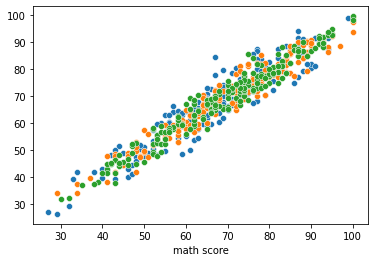

In [29]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=5)
print("For maths score:")
run_model(model,X1_train,y1_train,X1_test,y1_test)
print("For reading score:")
run_model(model,X2_train,y2_train,X2_test,y2_test)
print("For writing score:")
run_model(model,X3_train,y3_train,X3_test,y3_test)

# SVR:

For maths score:
MAE IS 3.019231640593591
RMSE IS 3.8337393241537696
For reading score:
MAE IS 2.441946095971937
RMSE IS 3.1280900796780253
For writing score:
MAE IS 2.1859787605745713
RMSE IS 2.726047669106658


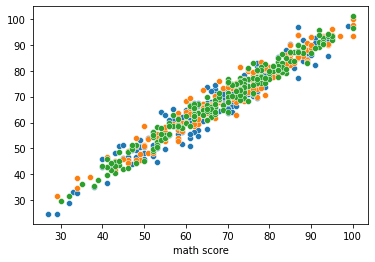

In [30]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr=SVR()
param_grid={'C':[0.01,0.1,1,5,10,100,1000], 'gamma':['auto','scale']}
grid=GridSearchCV(svr,param_grid)
print("For maths score:")
run_model(grid,X1_train,y1_train,X1_test,y1_test)
print("For reading score:")
run_model(grid,X2_train,y2_train,X2_test,y2_test)
print("For writing score:")
run_model(grid,X3_train,y3_train,X3_test,y3_test)


# Decision Tree:

For maths score:
MAE IS 4.585
RMSE IS 5.938223640113263
For reading score:
MAE IS 3.485
RMSE IS 4.52133829745132
For writing score:
MAE IS 3.0125
RMSE IS 3.8381310556050585


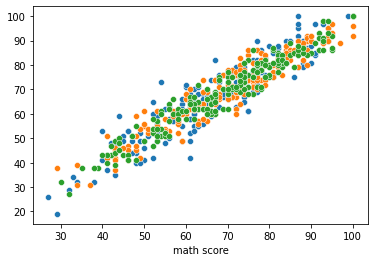

In [31]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
print("For maths score:")
run_model(model,X1_train,y1_train,X1_test,y1_test)
print("For reading score:")
run_model(model,X2_train,y2_train,X2_test,y2_test)
print("For writing score:")
run_model(model,X3_train,y3_train,X3_test,y3_test)

# TASK 2(PART 2)--> ANSWER 2 AND 3

In [32]:
X0=df.drop(['race/ethnicity'],axis=1)
y0=df["race/ethnicity"]

In [33]:
from sklearn.model_selection import train_test_split
X0_train,X0_test,y0_train,y0_test=train_test_split(X0,y0,test_size=0.2,random_state=101)

In [34]:
def sample_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    preds=model.predict(X_test)
    from sklearn.metrics import classification_report,accuracy_score
    accuracy=accuracy_score(y_test,preds)
    report=classification_report(y_test,preds)
    print(f'ACCURACY IS {accuracy}')
    print(report)
    sns.boxplot(x=y_test,y=preds)

# Logistic Regression:

c:\users\soosan shabnam\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\soosan shabnam\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\soosan shabnam\appdata\local\programs\python\python39\lib\site-packages\sklearn\metric

ACCURACY IS 0.3
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.13      0.05      0.07        40
           3       0.32      0.66      0.43        58
           4       0.36      0.30      0.32        54
           5       0.20      0.12      0.15        33

    accuracy                           0.30       200
   macro avg       0.20      0.22      0.19       200
weighted avg       0.25      0.30      0.25       200



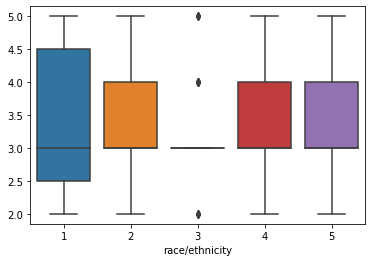

In [35]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
sample_model(model,X0_train,y0_train,X0_test,y0_test)

# KNN:

ACCURACY IS 0.25
              precision    recall  f1-score   support

           1       0.06      0.07      0.06        15
           2       0.23      0.25      0.24        40
           3       0.26      0.43      0.32        58
           4       0.32      0.19      0.24        54
           5       0.36      0.12      0.18        33

    accuracy                           0.25       200
   macro avg       0.25      0.21      0.21       200
weighted avg       0.27      0.25      0.24       200



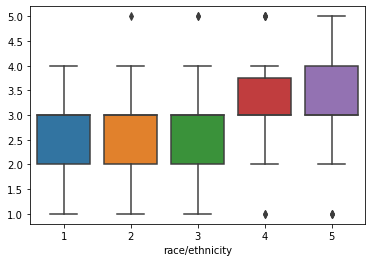

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
sample_model(model,X0_train,y0_train,X0_test,y0_test)

# SVM:

ACCURACY IS 0.25
              precision    recall  f1-score   support

           1       0.06      0.07      0.06        15
           2       0.23      0.25      0.24        40
           3       0.26      0.43      0.32        58
           4       0.32      0.19      0.24        54
           5       0.36      0.12      0.18        33

    accuracy                           0.25       200
   macro avg       0.25      0.21      0.21       200
weighted avg       0.27      0.25      0.24       200



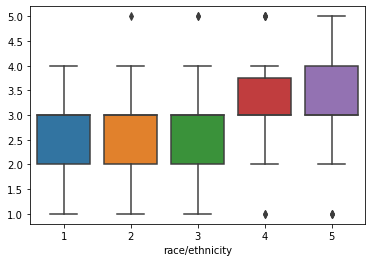

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
param_grid={'C':[0.01,0.1,1,5,10,100,1000], 'gamma':['auto','scale']}
grid=GridSearchCV(svc,param_grid)
sample_model(model,X0_train,y0_train,X0_test,y0_test)

# Random Forest:

ACCURACY IS 0.23
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.22      0.17      0.19        40
           3       0.27      0.45      0.33        58
           4       0.17      0.13      0.15        54
           5       0.27      0.18      0.22        33

    accuracy                           0.23       200
   macro avg       0.19      0.19      0.18       200
weighted avg       0.21      0.23      0.21       200



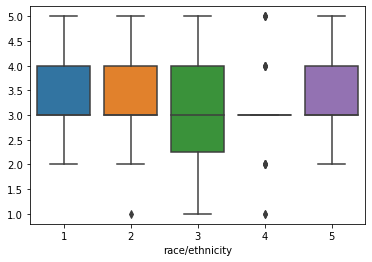

In [38]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
sample_model(model,X0_train,y0_train,X0_test,y0_test)

# TASK 2(PART 2)--> ANSWER 4

In [ ]:
 """ MAE: Mean absolute error is the arithmatic average of the absolute errors 
     between predicted value and the true value.
     RMSE: Root mean squared error is a frequently used measure of differences between 
     values predicted by a model and the true value. RMSE is the standard deviation of 
     the residuals (prediction errors). 
     Accuracy: Accuracy is a metrix that generally describes how the model performs across
     all classes. It calculates the ratio between the number of correct predictions and the 
     total number of predictions.
     Classification Report: Its a performance evaluation matrix. It is used to show the precision,
     recall, F1 score and support."""

# TASK 2(PART 2)--> ANSWER 5

# Applying Elastic Net:

In [40]:
def run_model(X_train,y_train,X_test,y_test):
    from sklearn.linear_model import ElasticNet
    base_elastic_net_model=ElasticNet()
    param_grid={'alpha':[0.1,0.3,0.5,0.8,10,30,50,80,100],'l1_ratio':[0.1,0.3,0.5,0.7,0.9,0.95,0.99,1]}
    from sklearn.model_selection import GridSearchCV
    grid_model=GridSearchCV(estimator=base_elastic_net_model,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,verbose=2)
    grid_model.fit(X_train,y_train)
    preds=grid_model.predict(X_test)
    from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    mae=mean_absolute_error(y_test,preds)
    print(f'MAE IS {mae}')
    print(f'RMSE IS {rmse}')
    
   

In [41]:
print("For maths score:")
run_model(X1_train,y1_train,X1_test,y1_test)
print("For reading score:")
run_model(X2_train,y2_train,X2_test,y2_test)
print("For writing score:")
run_model(X3_train,y3_train,X3_test,y3_test)

For maths score:
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END .....................

[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
MAE IS 3.042406118661162
RMS

[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...................

[CV] END .............................alpha=30, l1_ratio=0.3; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.3; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.3; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.3; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=80, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=80, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=80, l1_ratio=0.99; total time=   0.0s
[CV] END ...............................alpha=80, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=80, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=80, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=80, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=80, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.3, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.3, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.3, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.3, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.3, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.3, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.3, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.3, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.3, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.3, l1_ratio=0.99; total time=   0.0s
[CV] END ..............................alpha=0.3, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.3, l1_ratio=1; total time=   0.0s
[CV] END ...................

[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.0s
[CV] END ...................

[CV] END .............................alpha=80, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=80, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=80, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=80, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=80, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=80, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=80, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=80, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=80, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=80, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=80, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=80, l1_ratio=0.95; total time=   0.0s
[CV] END ...................

# GRID SEARCH ON SVR:

In [42]:
def model1(X_train,y_train,X_test,y_test):
    from sklearn.model_selection import GridSearchCV
    svm=SVR()
    param_grid={'C':[0.01,0.05,0.1,0.3,0.5,1],'kernel':['linear','sigmoid','poly','rbf'],'gamma':['auto','scale']}
    grid=GridSearchCV(svm,param_grid)
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()
    scaled_X_train=scaler.fit_transform(X_train)
    scaled_X_test=scaler.transform(X_test)
    grid_model=grid.fit(scaled_X_train,y_train)
    preds=grid_model.predict(scaled_X_test)
    from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_error
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    mae=mean_absolute_error(y_test,preds)
    print(f'MAE IS {mae}')
    print(f'RMSE IS {rmse}')




In [43]:
print("For maths score:")
model1(X1_train,y1_train,X1_test,y1_test)
print("For reading score:")
model1(X2_train,y2_train,X2_test,y2_test)
print("For writing score:")
model1(X3_train,y3_train,X3_test,y3_test)

For maths score:
MAE IS 3.0416184771765313
RMSE IS 3.8451141039235006
For reading score:
MAE IS 2.465446042167081
RMSE IS 3.1449176220235504
For writing score:
MAE IS 2.2063774694093534
RMSE IS 2.75125530663983


# applying GridSearch on RandomForest:

In [45]:

def model_2(X_train,y_train,X_test,y_test):
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    n_estimators=[64,100,128,200]
    max_features=[2,3,4,5]
    bootstrap=[True,False]
    oob_score=[True,False]
    param_grid={'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap,'oob_score':oob_score}
    rfc=RandomForestClassifier()
    grid=GridSearchCV(rfc,param_grid)
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()
    scaled_X_train=scaler.fit_transform(X_train)
    scaled_X_test=scaler.transform(X_test)
    grid_model=grid.fit(scaled_X_train,y_train)
    preds=grid_model.predict(scaled_X_test)
    from sklearn.metrics import classification_report,accuracy_score
    accuracy=accuracy_score(y_test,preds)
    report=classification_report(y_test,preds)
    print(f'ACCURACY IS {accuracy}')
    print(report)
    
    
    



In [46]:
model_2(X0_train,y0_train,X0_test,y0_test)

c:\users\soosan shabnam\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\soosan shabnam\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\soosan shabnam\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 403, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of

ACCURACY IS 0.225
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.17      0.12      0.14        40
           3       0.26      0.43      0.32        58
           4       0.20      0.17      0.18        54
           5       0.27      0.18      0.22        33

    accuracy                           0.23       200
   macro avg       0.18      0.18      0.17       200
weighted avg       0.21      0.23      0.21       200



# Spary my accuracy. Gotta revise hyperparameter tuning :(